# 2D Histograms in physt

In [1]:
# Necessary import evil
%matplotlib inline
import physt
from physt import histogram2d, histogramdd, histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.random.normal(100, 1, 1000)
y = np.random.normal(10, 10, 1000)

In [3]:
h2 = histogram2d(x, y, [8, 4], name="Some histogram", axis_names=["x", "y"])
h2

Histogram2D(bins=(8, 4), total=1000.0)

In [4]:
h2.frequencies

array([[   1.,    8.,    4.,    0.],
       [   4.,   22.,   29.,    5.],
       [   7.,  113.,   58.,    7.],
       [  19.,  127.,  113.,    8.],
       [  15.,  145.,   96.,    8.],
       [   8.,   67.,   66.,    4.],
       [   3.,   29.,   22.,    3.],
       [   0.,    6.,    3.,    0.]])

## Plotting

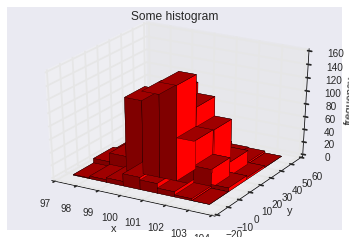

In [5]:
%matplotlib inline
ax = h2.plot(color="r")

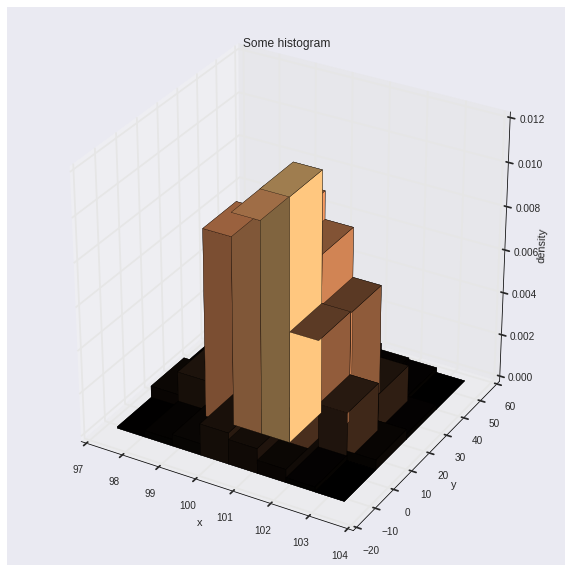

In [6]:
%matplotlib inline
import matplotlib.cm as cm

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax = h2.plot(ax=ax, cmap=cm.copper, density=True)

## Projections

/home/honza/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


Histogram1D(bins=8, total=1000.0)

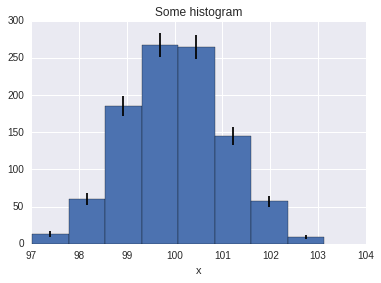

In [7]:
h1 = h2.projection("x")
h1.plot(errors=True)
h1

/home/honza/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


Histogram1D(bins=4, total=1000.0)

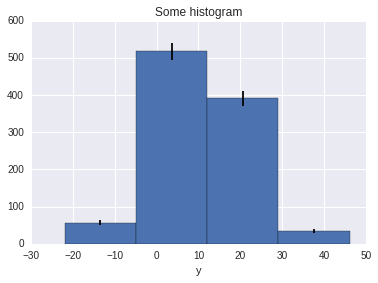

In [8]:
h1 = h2.projection("y")
h1.plot(errors=True)
h1

## N-dimensional histograms

In [9]:
data = [np.random.rand(1000)[:, np.newaxis] for i in range(4)]
data = np.concatenate(data, axis=1)
h5 = histogramdd(data, [3, 2, 2, 3], axis_names="abcd")
h5

HistogramND(bins=(3, 2, 2, 3), total=1000.0)

In [10]:
h5.frequencies

array([[[[ 34.,  21.,  37.],
         [ 33.,  23.,  30.]],

        [[ 27.,  35.,  30.],
         [ 25.,  17.,  33.]]],


       [[[ 30.,  32.,  21.],
         [ 26.,  30.,  22.]],

        [[ 30.,  29.,  33.],
         [ 40.,  20.,  21.]]],


       [[[ 22.,  27.,  18.],
         [ 35.,  28.,  25.]],

        [[ 28.,  33.,  20.],
         [ 26.,  19.,  40.]]]])

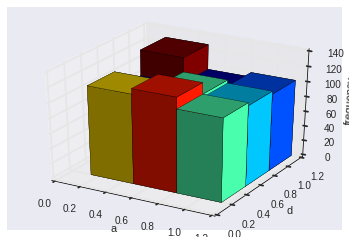

In [11]:
h5.projection("a", "d").plot();

/home/honza/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


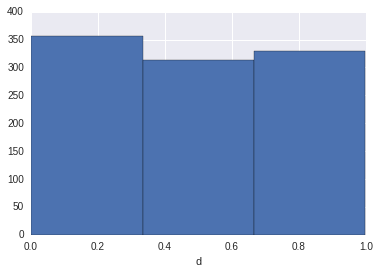

In [12]:
h5.projection("d").plot();

## Support for pandas DataFrames (without pandas dependency ;-))

In [13]:
# Load notorious example data set
import seaborn as sns
iris = sns.load_dataset('iris')

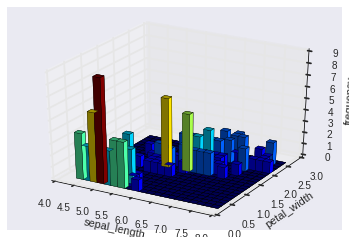

In [14]:
iris_hist = histogramdd(iris[["sepal_length", "petal_width"]], 20)
iris_hist.plot();

/home/honza/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


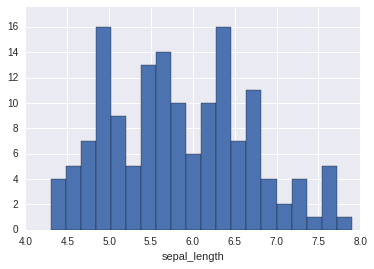

In [15]:
iris_hist.projection("sepal_length").plot();